In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas
!pip install rtree
!brew install spatialindex
!pip install pygeos

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 16.7 MB 42.0 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
     |████████████████████████████████| 994 kB 5.0 MB/s 
/bin/bash: brew: command not found
     |████████████████████████████████| 2.1 MB 5.2 MB/s 


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
area1 = gpd.read_file('/content/drive/MyDrive/10 GeoPandas Applications/10 Applications of GeoPandas/Study_Area_1.shp')
area2 = gpd.read_file('/content/drive/MyDrive/10 GeoPandas Applications/10 Applications of GeoPandas/Study_Area_2.shp')
river = gpd.read_file('/content/drive/MyDrive/10 GeoPandas Applications/10 Applications of GeoPandas/river.shp')

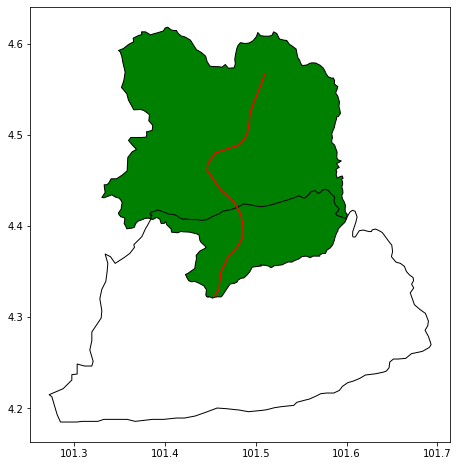

In [6]:
fig,ax = plt.subplots(figsize=[12,8])
area1.plot(ax=ax,color='green',edgecolor='black')
area2.plot(ax=ax,color='none',edgecolor='black')
river.plot(ax=ax,color='red')

#Intersection

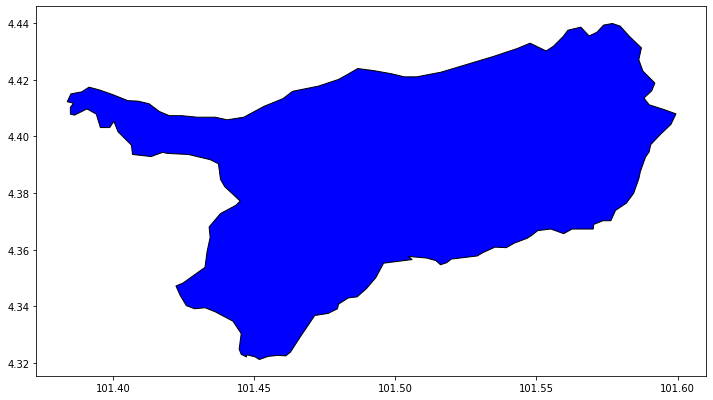

In [8]:
intersection = gpd.overlay(area1,area2,how='intersection')
intersection.plot(color='blue',edgecolor='black',figsize=[12,8])

#Union

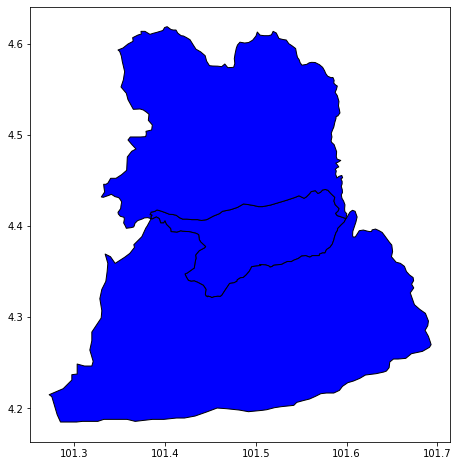

In [14]:
union = gpd.overlay(area1,area2,how='union')
union.plot(color = 'blue',edgecolor='black',figsize=[12,8])

#Symmetric Difference

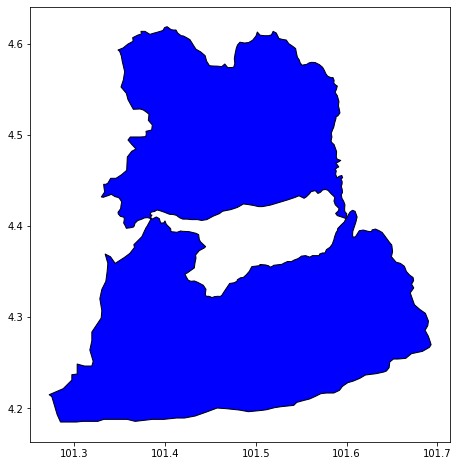

In [15]:
sd = gpd.overlay(area1,area2,how='symmetric_difference')
sd.plot(color = 'blue',edgecolor='black',figsize=[12,8])

#Difference

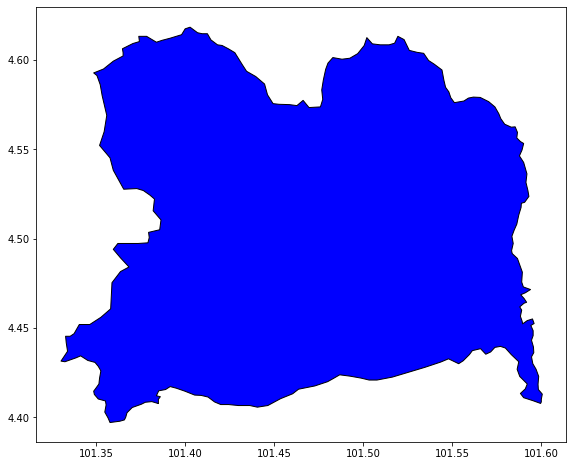

In [16]:
diff = gpd.overlay(area1,area2,how='difference')
diff.plot(color = 'blue',edgecolor='black',figsize=[12,8])

#Dissolve
aggregation two polygon into one polygon

                                                   geometry  ...        desc_2
dissolve                                                     ...              
1         POLYGON ((101.59948 4.40801, 101.60370 4.41514...  ...  Study_Area_2

[1 rows x 3 columns]
         desc_1  ... dissolve
0  Study_Area_1  ...        1
1  Study_Area_1  ...        1
2           NaN  ...        1

[3 rows x 4 columns]


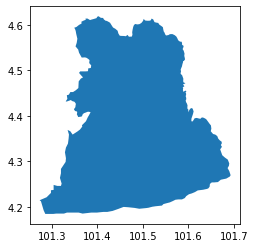

In [21]:
union['dissolve'] = 1
dissolve = union.dissolve(by='dissolve')
dissolve.plot()
print(dissolve)
print(union)

#Buffer

In [25]:
river_p = river.to_crs(epsg=24547) # epsg is specific coordinate systems worldwide, because this is part of malaysia map it has to 24547
buffer = river_p['geometry'].buffer(distance=500)

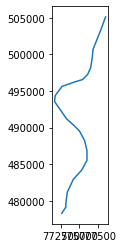

In [23]:
river_p.plot()

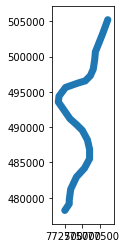

In [26]:
buffer.plot()

# Centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


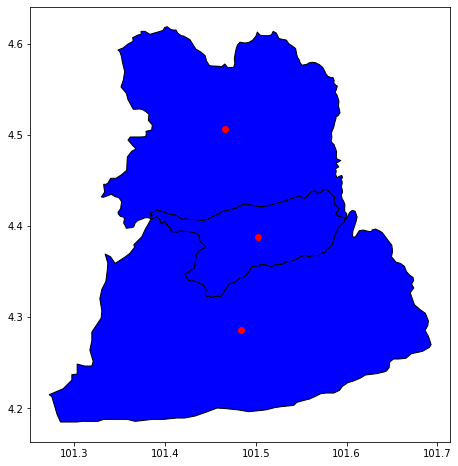

In [29]:
centroid = union['geometry'].centroid
fig1,ax1 = plt.subplots(figsize=[12,8])
union.plot(ax=ax1,color='blue',edgecolor='black')
centroid.plot(ax=ax1,color='red')

#XY Coordinates to Point Geomentries

In [30]:
import pandas as pd
airport = pd.read_csv('/content/drive/MyDrive/10 GeoPandas Applications/10 Applications of GeoPandas/us_airports.csv')

In [31]:
from shapely.geometry import Point

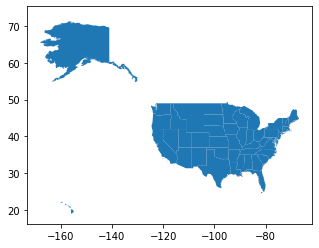

In [32]:
us_states = gpd.read_file('/content/drive/MyDrive/10 GeoPandas Applications/10 Applications of GeoPandas/us_states.shp')
us_states.plot()

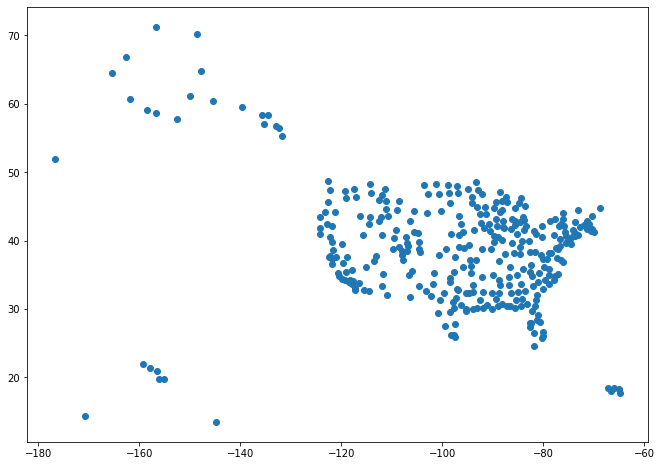

In [36]:
geometry = [Point(xy) for xy in zip(airport['LONGITUDE'],airport['LATITUDE'])]
airport_us = gpd.GeoDataFrame(airport, geometry = geometry, crs = us_states.crs)
airport_us.plot(figsize=[12,8])